<a href="https://colab.research.google.com/github/sarenales/MDD/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de implementación del algoritmo K-means
Vamos a implementar el algoritmo K-means desde cero usando Python. Para ello, primero vamos a importar las librerías necesarias.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd # Pandas se usa para gestionar los datos

## Carga de datos
Vamos a bajarnos el conjunto de datos llamado 'Mall_Customers.csv'. Es un archivo CSV que se aloja en EHUBox. Usaremos el comando `wget` de la línea de comandos de Linux. Es por ello que usamos `!` antes del comando: para que Colab sepa que no estamos escribiendo código de Python, sino que comandos de la línea de comandos de Linux.

In [ ]:
!wget -O Mall_Customers.csv https://ehubox.ehu.eus/s/9mbrEyPtQNt6HM8/download

--2022-11-11 15:27:40--  https://ehubox.ehu.eus/s/9mbrEyPtQNt6HM8/download
Resolving ehubox.ehu.eus (ehubox.ehu.eus)... 158.227.0.95
Connecting to ehubox.ehu.eus (ehubox.ehu.eus)|158.227.0.95|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4286 (4.2K) [text/csv]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   4.19K  --.-KB/s    in 0s      

2022-11-11 15:27:41 (142 MB/s) - ‘Mall_Customers.csv’ saved [4286/4286]



In [ ]:
!ls

Mall_Customers.csv  sample_data


Ahora vamos a leer el archivo CSV usando la librería Pandas, para explorar el contenido de este conjunto de datos.

In [ ]:
dataset = pd.read_csv('Mall_Customers.csv')
print(f'Cantidad de muestras: {len(dataset)}')
print(dataset.head()) # Ver las primeras 10 lineas del dataset
dataset.describe() # Obtener una descripcion completa del dataset con datos agregados

Cantidad de muestras: 200
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Para simplificar el problema y su visualización, vamos a quedarnos solo con las columnas "Annual Income" y "Spending Score". De esta manera, trabajaremos solo en dos dimensiones.

In [ ]:
X = dataset.iloc[:, [3, 4]].values
X.shape

(200, 2)

## El algoritmo K-means
Ya tenemos los datos preparados. Para empezar con la implementación del algoritmo K-means, definiremos el número máximo de iteraciones de nuestro algoritmo, para asegurarnos de que siempre termine (recordad que K-means no garantiza la convergencia del algoritmo). Definiremos también el número de clusters (K = 5 para este caso concreto).

In [ ]:
n_iter = 100
K = 5 # number of clusters
#np.random.seed(1) # Para reproducibilidad. Lo dejaremos comentado, para ver el efecto de inicializar los centroides aleatoriamente

**Paso 1**: Inicializar aleatoriamente los centroides.

In [ ]:

def init_centroids(X):
  """
  Esta funcion sirve para inicializar los centroides de forma aleatoria.
  Se escogen K muestras aleatorias de X como centroides.
  
  Input:

  X -- numpy-array de shape (200, 2) con las muestras que queremos clusterizar.

  Output:

  centroids -- numpy-array de shape (K, 2) con los K centroides aleatorios
  """

  centroids = np.zeros((K, 2))
  print("centroids shape: {}".format(centroids.shape))
  random_indices = np.random.randint(0, X.shape[0], size=K)
  print("random_indices shape: {}".format(random_indices.shape))
  print(random_indices)
  for x, i in zip(random_indices, range(K)):
    print("sample {}: {}".format(x, X[x]))
    centroids[i] = X[x]
  
  return centroids

# Probemos la funcion
centroids = init_centroids(X)
print("Centroids:")
print(centroids)

centroids shape: (5, 2)
random_indices shape: (5,)
[133  32 112  43 190]
sample 133: [72 71]
sample 32: [33  4]
sample 112: [64 42]
sample 43: [39 61]
sample 190: [103  23]
Centroids:
[[ 72.  71.]
 [ 33.   4.]
 [ 64.  42.]
 [ 39.  61.]
 [103.  23.]]


**Paso 2.a**: Calcular la matriz de distancias de todas las muestras de nuestro dataset a nuestros centroides. Usaremos la distancia euclídea.

In [ ]:
def calculate_distance(X, centroids):
  """
  Esta funcion calcula la distancia euclidea entre las muestras de X y los centroides en centroids.

  Input:

  X -- numpy-array de shape (200, 2)
  centroids -- numpy-array de shape (5, 2)

  Output:

  dist_matrix -- numpy-array de shape (200, 5)
  closest_centroid -- numpy-array de shape (200,) donde se guarda el centroide mas cercano de cada muestra

  """
  
  dist_matrix = np.zeros((X.shape[0], centroids.shape[0]))
  for i in range(X.shape[0]):
    x = X[i] # x es una muestra de 2 elementos
    dist = np.sqrt(np.sum((centroids - x)**2, axis=1))
    """
    if i == 0: # Por si acaso imprimimos el shape de dist una vez
      print("dist shape: {}".format(dist.shape))
    """
    dist_matrix[i] = dist
  
  closest_centroid = np.argmin(dist_matrix, axis=1)
  return dist_matrix, closest_centroid

# Probemos la funcion
dist_matrix, closest_centroid = calculate_distance(X, centroids)
print("dist_matrix shape: {}".format(dist_matrix.shape))
print("closest_centroid shape: {}".format(closest_centroid.shape))
print("{} distances: {}. Closest centroid: {}".format(X[0], dist_matrix[0], closest_centroid[0]))
print("{} distances: {}. Closest centroid: {}".format(X[1], dist_matrix[1], closest_centroid[1]))

dist_matrix shape: (200, 5)
closest_centroid shape: (200,)
[15 39] distances: [65.36818798 39.35733731 49.09175083 32.55764119 89.4427191 ]. Closest centroid: 3
[15 81] distances: [ 57.87054518  79.07591289  62.62587325  31.2409987  105.39449701]. Closest centroid: 3


**Paso 2.b**: Agrupar las muestras en torno a sus centroides y calcular los nuevos centroides.

In [ ]:
def calculate_new_centroids(X, closest_centroid):
  """
  Esta funcion agrupa las muestras de X segun closest_centroid

  Input:

  X -- numpy-array de shape (200, 2) con las muestras que queremos clusterizar
  closest_centroid -- numpy-array de shape (200,) donde se guarda el centroide mas cercano a cada muestra
  
  Output:
  
  new_centroids -- numpy-array de shape (5, 2) con los nuevos centroides
  partition -- diccionario con {num_centroide : [X_index]} representando las muestras que se agrupan en cada cluster

  """  

  partition = {k:[] for k in range(K)} # Inicializamos la particion con un diccionario vacio usando los indices de los clusters como clave y una lista vacia como valor
  #print("partition inicial: {}".format(partition))  
  for i in range(len(closest_centroid)):    
    partition[closest_centroid[i]].append(i)
  
  new_centroids = np.zeros((K, X.shape[1]))
  for i in range(K):
    x_samples = X[closest_centroid == i]    
    new_centroids[i] = np.mean(x_samples, axis=0)

  return partition, new_centroids

# Probemos la funcion
partition, new_centroids = calculate_new_centroids(X, closest_centroid)
print("Partition: {}".format(partition))
print("New centroids")
print(new_centroids)
print("Old centroids")
print(centroids)

Partition: {0: [88, 102, 117, 119, 122, 123, 125, 127, 129, 131, 133, 135, 137, 139, 141, 143, 145, 147, 149, 151, 153, 155, 157, 159, 161, 163, 165, 167, 169, 171, 173, 175, 177, 179, 181, 183, 185, 187, 189, 191, 193, 195, 197, 199], 1: [2, 6, 8, 10, 12, 14, 18, 22, 24, 26, 28, 30, 32, 34, 36, 38, 44], 2: [71, 72, 74, 75, 76, 77, 78, 79, 80, 82, 83, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 118, 120, 121, 124, 126, 128, 130, 132, 142, 146, 148, 160], 3: [0, 1, 3, 4, 5, 7, 9, 11, 13, 15, 16, 17, 19, 20, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 73, 81, 84], 4: [134, 136, 138, 140, 144, 150, 152, 154, 156, 158, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180, 182, 184, 186, 188, 190, 192, 194, 196, 198]}
New centroids
[[84.         79.45454545]
 [26.52941176 15.35294118]
 [62.

**Paso 2.c**: Mirar si el algoritmo ha convergido. Para ello, miraremos que los centroides no se hayan movido "mucho" desde la última iteración.

In [ ]:
def check_convergence(old_centroids, new_centroids, threshold):
  """
  Esta funcion mira si el algoritmo KMeans ha convergido, basándose en la distancia entre los viejos y los nuevos centroides.
  Si la distancia de cada centroide está por debajo de threshold, devolvemos True.

  Input:

  old_centroids -- numpy-array de shape (K, 2) con los centroides de la iteracion anterior.
  new_centroids -- numpy-array de shape (K, 2) con los nuevos centroides.

  Output:

  True -- si la distancia de todos los centroides es menor a threshold
  False -- else

  """

  result = []
  for i in range(old_centroids.shape[0]):
    rs = np.sqrt(np.sum((old_centroids[i] - new_centroids[i])**2)) 
    result.append(rs)
  print("convergence result is {}".format(result))
  count = 0
  for i in range(len(result)):
    if result[i] <= threshold:
      count = count+1
  
  return True if count == len(result) else False

# Probemos nuestra funcion
conv = check_convergence(centroids, new_centroids, 0.1)
print("centroids:")
print(centroids)
print("new centroids:")
print(new_centroids)
print("Convergence is: {}".format(conv))
# Ahora pasemos a la funcion los mismos centroides para ver si funciona bien
conv = check_convergence(centroids, centroids, 0.1)
print("Convergence between the same centroids: {}".format(conv))

convergence result is [14.67921451723406, 13.067432244596795, 3.039141828620014, 3.280701754385966, 13.956617002163]
centroids:
[[ 72.  71.]
 [ 33.   4.]
 [ 64.  42.]
 [ 39.  61.]
 [103.  23.]]
new centroids:
[[84.         79.45454545]
 [26.52941176 15.35294118]
 [62.03773585 44.32075472]
 [35.71929825 61.        ]
 [91.06896552 15.75862069]]
Convergence is: False
convergence result is [0.0, 0.0, 0.0, 0.0, 0.0]
Convergence between the same centroids: True


**K-means**: Ahora usaremos las funciones que acabamos de implementar para construir el algoritmo K-means. Recordad que estos son los pasos a dar:


*   Inicializar los centroides.
*   Hasta que el algoritmo converja (loop):
   * Calcular las distancias entre las muestras y los centroides.
   * Agrupar las muestras en torno al centroide más cercano.
   * Calcular los nuevos centroides.
   * Mirar si el algoritmo ha convergido.

In [ ]:
def our_Kmeans(X, n_clusters, max_iter):
  """
  Esta funcion implementa el algoritmo KMeans basico.

  Input:

  X -- numpy-array de shape (200, 2) donde estan las muestras a clusterizar.
  n_clusters -- el numero de clusters.
  max_iter -- el numero maximo de iteraciones del algoritmo

  Output:

  partition -- diccionario con {num_centroid : [X_index]} representando las muestras que se agrupan en cada cluster
  new_centroids -- numpy-array de shape (K, 2) con los centroides finales
  iters -- entero que muestra el numero total de iteraciones ejecutadas
  """
  partition = {}
  centroids = init_centroids(X)
  new_centroids = None
  iters = 0
  for i in range(max_iter):
    iters += 1
    dist_matrix, closest_centroid = calculate_distance(X, centroids)
    partition, new_centroids = calculate_new_centroids(X, closest_centroid)
    conv = check_convergence(centroids, new_centroids, 0.1)
    # Actualizar centroids para la siguiente iteracion
    centroids = new_centroids

    # Mirar si tenemos que parar
    if conv == True:
      break

  return partition, new_centroids, iters

  
# Y ahora si! Vamos a ejecutar nuestro algoritmo KMeans
partition, new_centroids, iters = our_Kmeans(X, K, n_iter)

print("Numero de iteraciones: {}".format(iters))
print("Particion final:")
print(partition)
print("Centroides finales:")
print(new_centroids)

centroids shape: (5, 2)
random_indices shape: (5,)
[143 137  13  79  92]
sample 143: [76 87]
sample 137: [73 73]
sample 13: [20 77]
sample 79: [54 42]
sample 92: [60 49]
convergence result is [14.62040162469201, 7.818747501998002, 5.29596629324678, 13.810841781819892, 8.779171154149246]
convergence result is [1.4161142586498199, 1.520722345011508, 3.135097861884862, 8.171839297692179, 3.335599457129599]
convergence result is [2.688161667743869, 2.725900618411744, 1.85672218722179, 4.956637090758146, 1.8647257026565507]
convergence result is [6.5392325620060285, 3.9090736885433133, 3.7912861916077567, 8.837068440157346, 3.3798134943005125]
convergence result is [3.348321426857194, 1.2474597250394353, 3.237056931731028, 0.8864683339321279, 1.1572561630685108]
convergence result is [4.872856379648122, 1.5334594742554162, 2.24147740416582, 0.0, 1.1536197245079476]
convergence result is [0.0, 0.0, 4.3385872011100135, 2.668726056648021, 2.1372627770750463]
convergence result is [0.0, 0.0, 2.

##Visualizando los resultados

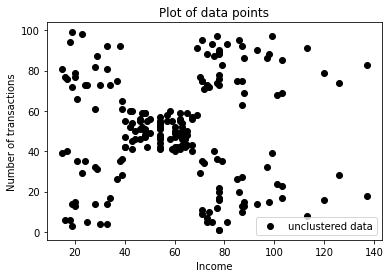

In [ ]:
plt.scatter(X[:,0], X[:,1], c='black', label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

Ahora vamos a ver los datos clusterizados:

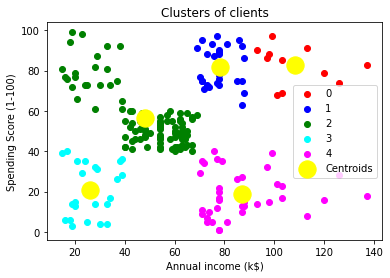

In [ ]:
color=['red','blue','green','cyan','magenta']
#labels=['cluster1','cluster2','cluster3','cluster4','cluster5']
labels = range(K)
for k in range(K):
    plt.scatter(X[partition[k], 0], X[partition[k], 1],c=color[k],label=labels[k])
plt.scatter(new_centroids[:, 0], new_centroids[:, 1],s=300,c='yellow',label='Centroids')
plt.title("Clusters of clients")
plt.xlabel("Annual income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

# K-means en Scikit-learn
En vez de usar nuestra implementación, vamos a usar una implementación profesional, que podemos encontrar en la librería Scikit-learn de Python. 

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, init="k-means++", max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

Así de sencillo es usar un algoritmo como este teniendo la librería adecuada. Pero fijémonos en las mejoras que trae esta implementación respecto a la nuestra:


*   Inicialización de los centroides: al usar init="k-means++", los centroides no se eligen de forma aleatoria. Se usa el algoritmo de Lloyd o Elkan, que asegura una elección más inteligente que ayude a la convergencia de K-means.
*   Repeticiones con varias inicializaciones: el parámetro n_init=10 significa que K-means se ejecuta 10 veces con 10 inicializaciones diferentes de centroides. Al final, se queda con el mejor resultado. ¿Cómo? Eso lo veremos cuando hablemos de evaluación...

Con todo, visualicemos el resultado como antes.

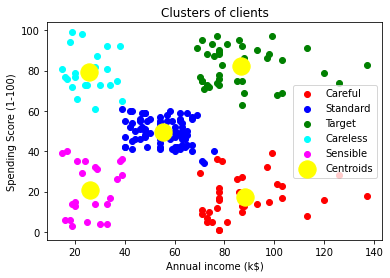

In [ ]:
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], c="red", label="Careful")
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], c="blue", label="Standard")
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], c="green", label="Target")
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], c="cyan", label="Careless")
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], c="magenta", label="Sensible")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="Centroids")
plt.title("Clusters of clients")
plt.xlabel("Annual income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()